In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dense, GRU, Embedding, Dropout
from keras.optimizers import RMSprop
from keras import activations
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
#from keras.initializers import RandomUniform
#from keras.initializers import Initializer

import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math




sns.set_style("whitegrid")
current_palette = sns.color_palette('colorblind')

Using TensorFlow backend.


In [2]:
features = 20 #entspricht der Anzahl der Sensoren
timesteps = 22 # *0.05s --> definiert die Zeitspanne in der zeitliche Abhängigkeiten vom Netzwerk erlernt werden können
batchsize = 128
LSTM_size = 64 #ANzahl der LSTM-Zellen
Dense_size = 32
epochen = 100


name = 'NN2_3_1_2_Mz'

#init = RandomUniform(minval=-0.05, maxval=0.05)

In [3]:
from keras.models import load_model

model = load_model('model/'+name)

#### Aufbau Model

In [76]:
model = Sequential()
model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=True,
               batch_input_shape=(None, timesteps, features)))
#model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=True))
model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=False))
#model.add(Dense(Dense_size))
model.add(Dense(Dense_size))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

#### Trainingsdaten laden

In [5]:
x_train = np.load('Regression_Daten/x_train.npy').astype('float32')
x_val = np.load('Regression_Daten/x_val.npy').astype('float32')
x_test = np.load('Regression_Daten/x_test.npy').astype('float32')

y_train = np.load('Regression_Daten/y_Mz_train2.npy').astype('float32')
y_val = np.load('Regression_Daten/y_Mz_val2.npy').astype('float32')
y_test = np.load('Regression_Daten/y_Mz_test2.npy').astype('float32')

#### Model trainieren

In [78]:
model.fit(x_train, y_train,
          batch_size=batchsize , epochs=epochen, validation_data=(x_val, y_val))

Train on 11392 samples, validate on 2944 samples
Epoch 1/100
11392/11392 [==============================] - 5s 435us/step - loss: 80.5287 - val_loss: 135.1637
Epoch 2/100
11392/11392 [==============================] - 3s 282us/step - loss: 78.8593 - val_loss: 134.9498
Epoch 3/100
11392/11392 [==============================] - 3s 280us/step - loss: 78.3108 - val_loss: 135.9605
Epoch 4/100
11392/11392 [==============================] - 3s 273us/step - loss: 77.5553 - val_loss: 135.4722
Epoch 5/100
11392/11392 [==============================] - 3s 282us/step - loss: 77.1010 - val_loss: 136.1593
Epoch 6/100
11392/11392 [==============================] - 3s 297us/step - loss: 77.2316 - val_loss: 138.2726
Epoch 7/100
11392/11392 [==============================] - 3s 281us/step - loss: 76.9244 - val_loss: 137.4398
Epoch 8/100
11392/11392 [==============================] - 3s 279us/step - loss: 77.0596 - val_loss: 137.2841
Epoch 9/100
11392/11392 [==============================] - 3s 295us/ste

In [79]:
history_dict = model.history.history
history_dict

{'val_loss': [135.16367218805397,
  134.9498313147089,
  135.9605003543522,
  135.47224897405377,
  136.15934493489888,
  138.2725725588591,
  137.4397633827251,
  137.2840695122014,
  136.73512259773585,
  136.38118195792904,
  137.79151871411696,
  137.19939041915148,
  136.23730771697086,
  135.69791185337564,
  137.3448102577873,
  136.83279699346295,
  136.6858893270078,
  135.71175315069115,
  136.94101787650067,
  137.57568349786428,
  136.3057704490164,
  137.26707619687787,
  136.35661663438964,
  135.87159798456275,
  135.8586028399675,
  135.89134248443273,
  135.88904394015023,
  136.76006380630577,
  136.41429796426192,
  135.99628908737847,
  136.26199219019517,
  136.25398697542107,
  136.3354464562043,
  135.7881511501644,
  135.10505639988443,
  135.98467486060184,
  135.95169731326726,
  135.82371818760166,
  135.63121779327807,
  135.6072580581126,
  135.16173247669053,
  136.00214372510496,
  135.63827047140703,
  135.60304602332738,
  135.59922474881878,
  135.7619

#### Analysiere Trainingsergebnisse

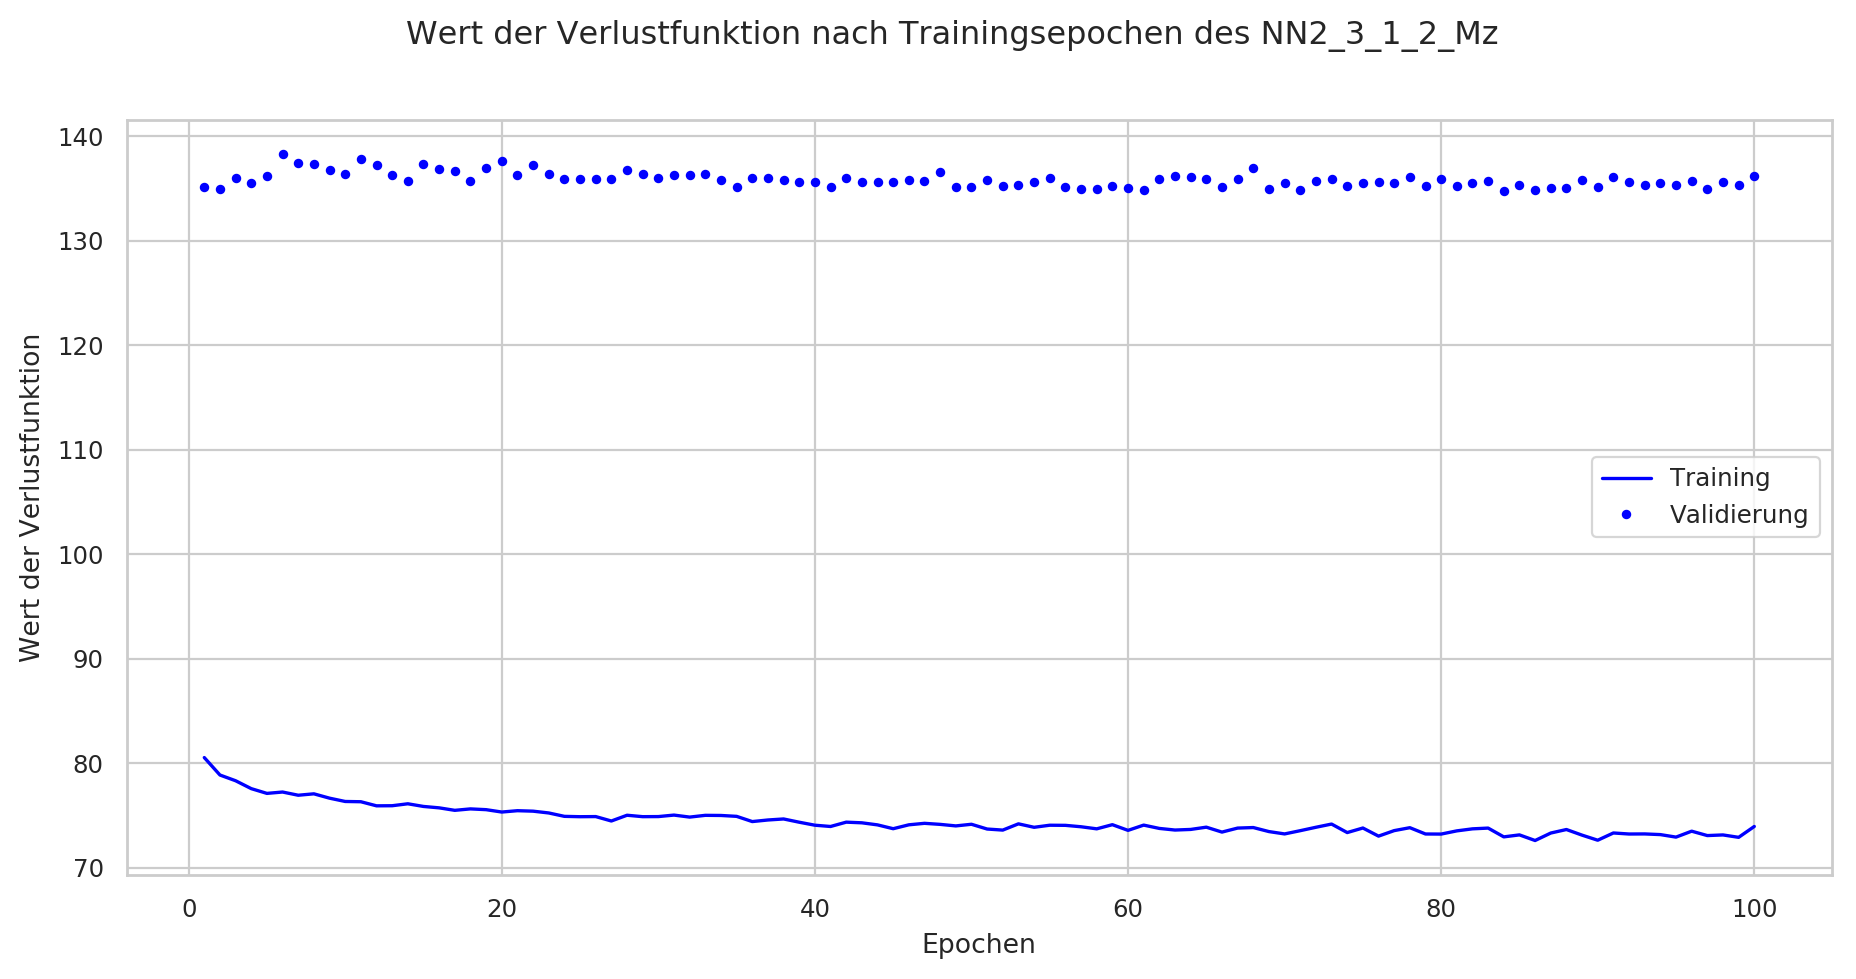

In [80]:
sns.set_context("paper")

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(num=None, figsize=(11,5), dpi=200, facecolor='w', edgecolor='k')
#f, (ax1,ax2) = plt.subplots(1,2, figsize=(11, 5), dpi=100, facecolor='w', edgecolor='k')
#f.suptitle('Trainingsverlauf '+name)
plt.plot(epochs, loss_values, 'b',label='Training')
plt.plot(epochs, val_loss_values, 'b.',label='Validierung')
plt.suptitle('Wert der Verlustfunktion nach Trainingsepochen des '+name)
plt.xlabel('Epochen')
plt.ylabel('Wert der Verlustfunktion')

plt.legend()#bbox_to_anchor=(0.9, 0., 0.5, 0.5), borderaxespad=1)
plt.show()

#### Anwendung des trainierten Models auf 'unbekannte' Trainingsdaten

In [6]:
predictions = model.predict(x_test,batch_size=batchsize)
y_real = y_test

In [7]:
predictions.shape

(4480, 1)

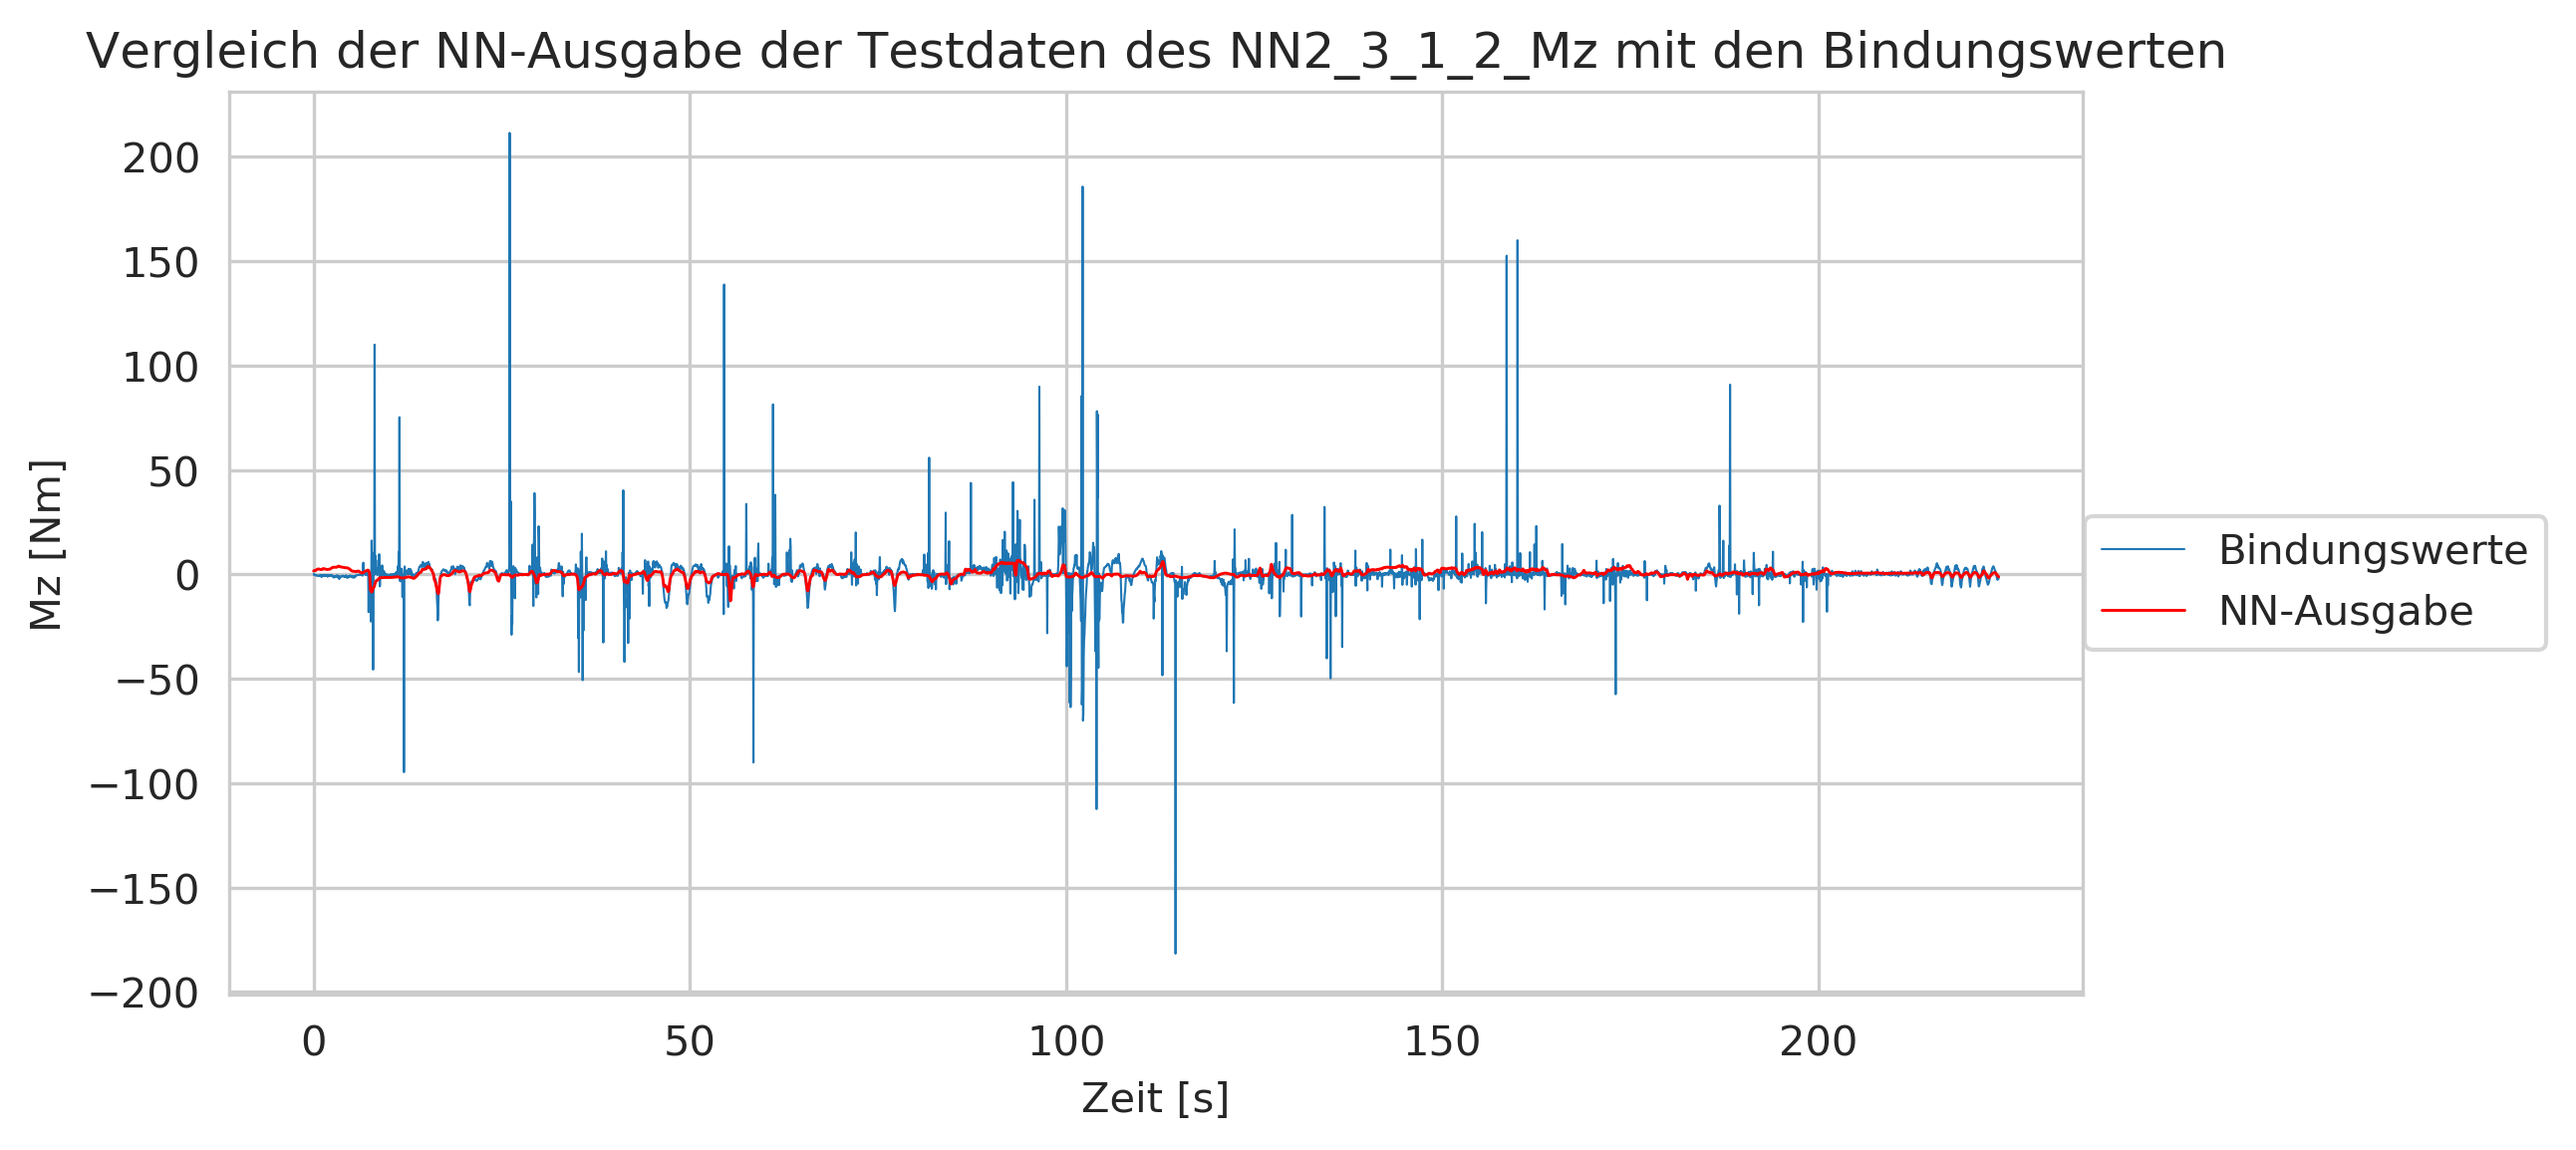

In [15]:
plt.figure(num=None, figsize=(8,4), dpi=300, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), y_real, label='Bindungswerte', linewidth=0.5)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.7)

plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('Mz [Nm]')
plt.legend(bbox_to_anchor=(0.7, 0.15, 0.55, 0.38), borderaxespad=0)
#plt.xlim(left=140, right=220)
#plt.xlim(left=150, right=200)
#plt.ylim(bottom=-10, top=10)
plt.show()

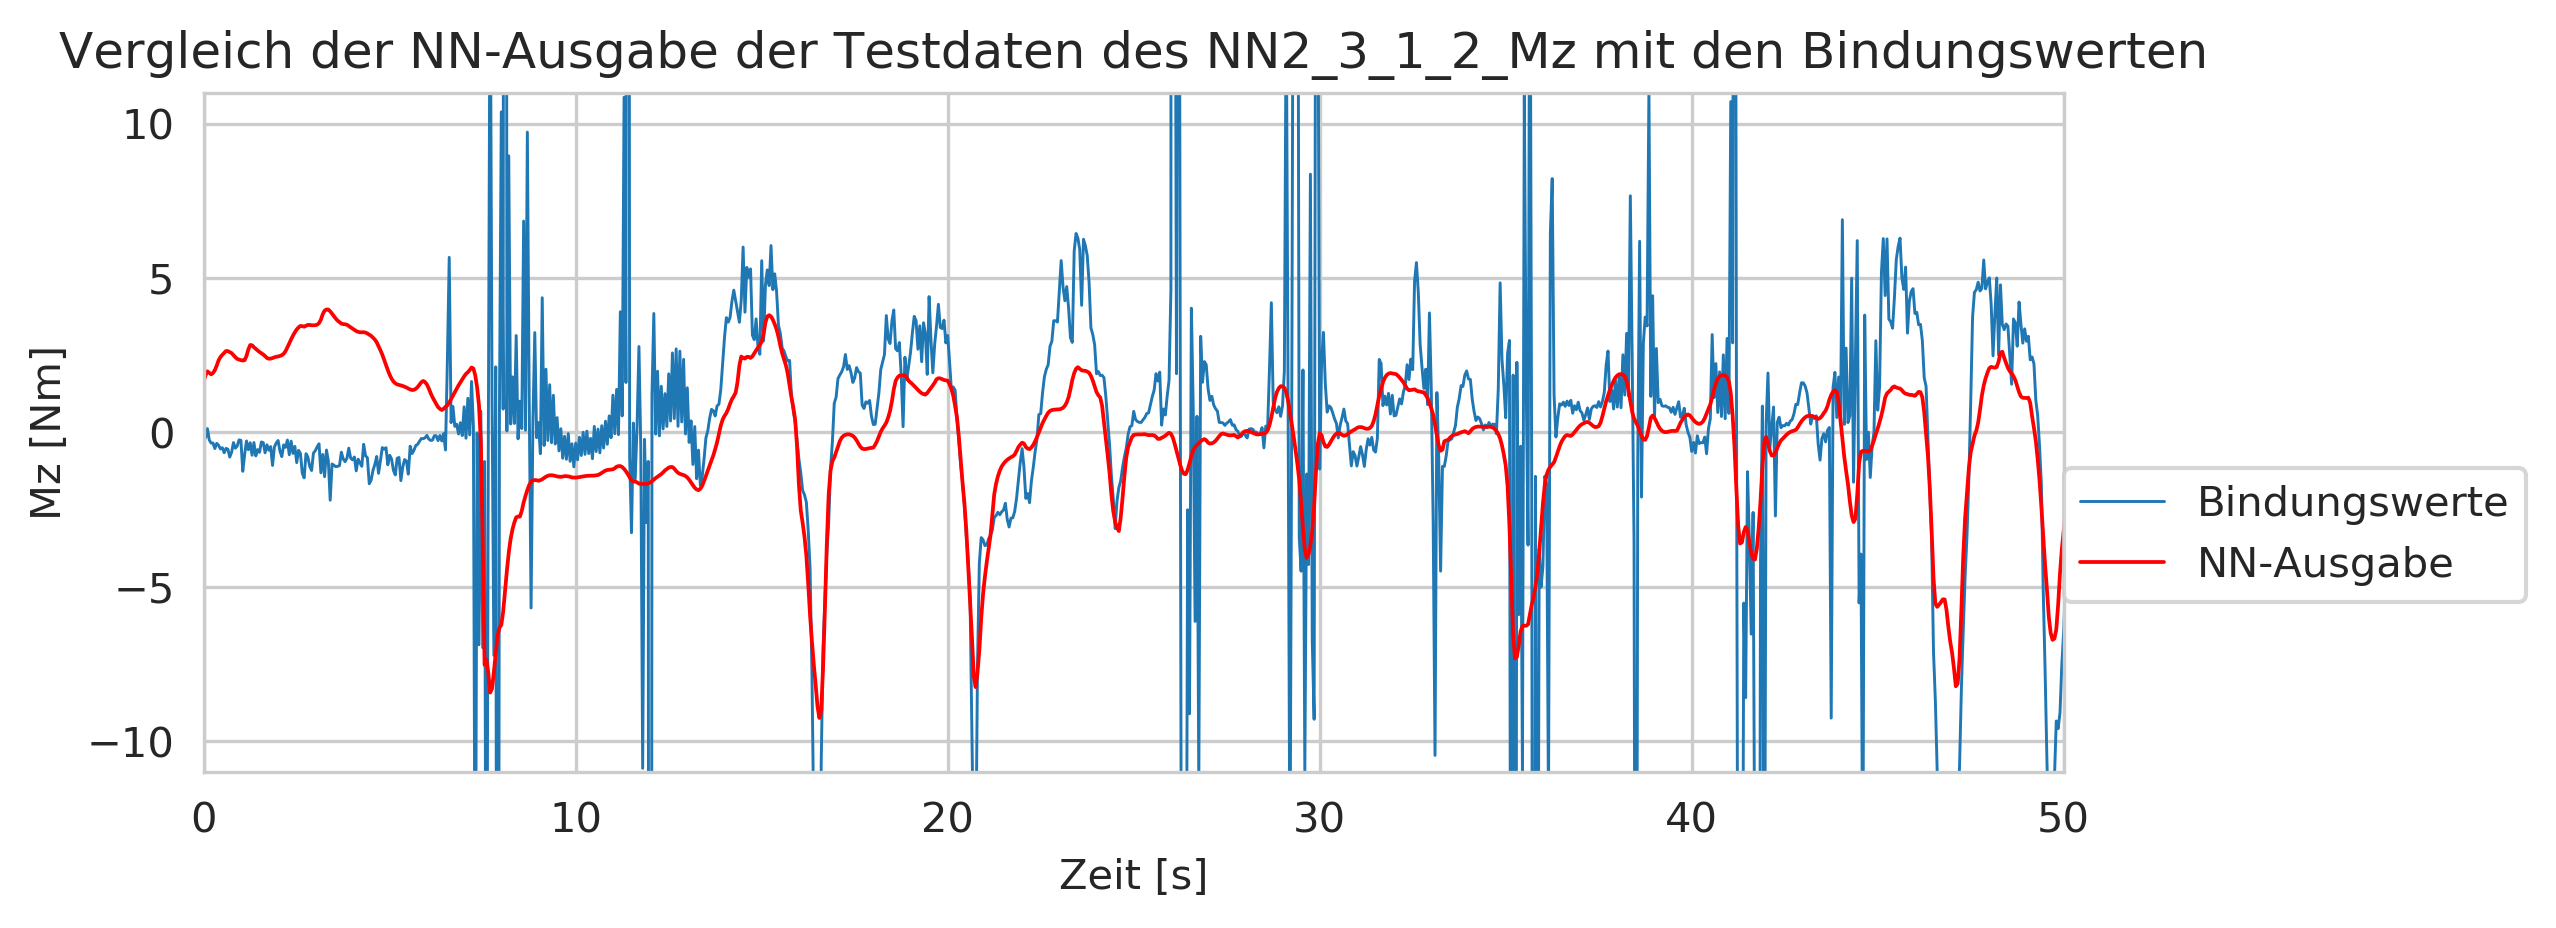

In [26]:
plt.figure(num=None, figsize=(8,3), dpi=300, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), y_real, label='Bindungswerte', linewidth=0.7)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.9)

plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('Mz [Nm]')
plt.legend(bbox_to_anchor=(1, 0.25, 0.3, 0.45), borderaxespad=0)
plt.xlim(left=0, right=50)
#plt.xlim(left=150, right=200)
plt.ylim(bottom=-11, top=11)
plt.show()

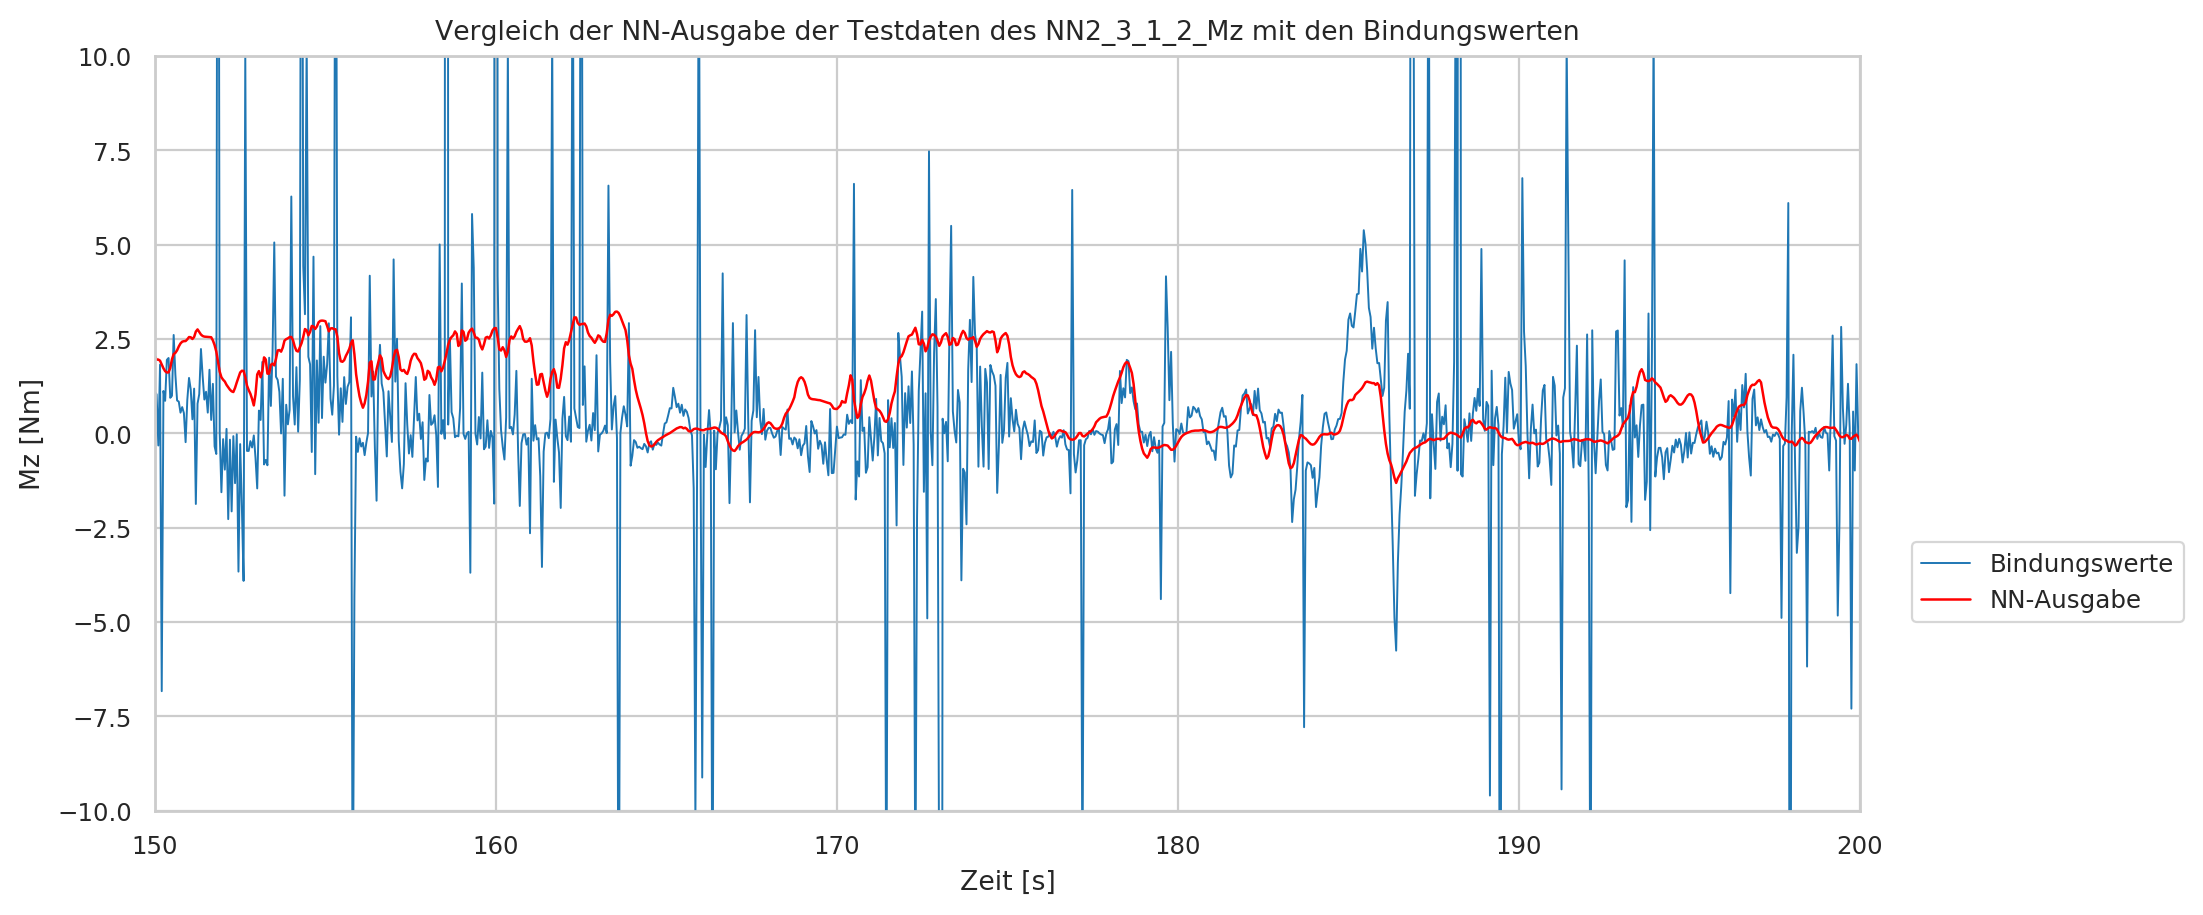

In [85]:
plt.figure(num=None, figsize=(11,5), dpi=200, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), y_real, label='Bindungswerte', linewidth=0.7)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.9)

plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('Mz [Nm]')
plt.legend(bbox_to_anchor=(0.61, 0.25, 0.58, 0.45), borderaxespad=0)
#plt.xlim(left=0, right=50)
plt.xlim(left=150, right=200)
plt.ylim(bottom=-10, top=10)
plt.show()

## Zusammenfassung

In [27]:
# Nach welcher Epoche sollte das Training optimalerweise abgeschlossen werden?
# Vorgehen: einmal Netzwerk berechnen in 25 Epochen -> optimale Epochenanzahl anhand 'min_index_val_loss+1' ablesen und als Parameter oben angeben,
#           danach Netzwerk neu berechnen lassen.
min_index_val_loss, min_value_val_loss = min(enumerate(history_dict['val_loss']), key=operator.itemgetter(1))
#max_index_val_acc, max_value_val_acc = max(enumerate(history_dict['val_acc']), key=operator.itemgetter(1))
print('Ergebnisse der Validierungsdaten:')
print('  opimale Epochenanzahl:                 '+str(min_index_val_loss+1))
print('  minimaler Verlust:                     '+str(min_value_val_loss)+'\n')

print('Ergebnisse der Trainingdaten zur optimalen Epochenzahl:')
print('  Verlust:                               '+str(history_dict['loss'][min_index_val_loss]) + '\n')


NameError: name 'history_dict' is not defined

In [28]:
# Beurteilung der Testdaten: Vergleich von 'predictions' mit y_real
#                  - Kreuzkorrelation
#                  - Euklidsche Distanz


#   Kreuzkorrelation
print('Vergleich der Vorhersagewerte mit den Bindungswerten:')
print('  Korrelationskoeffizient:               '+ str(np.corrcoef(np.transpose(predictions),np.transpose(y_real))[0,1]))

#   Euklidsche Distanz
summe=0
for i in range(len(predictions)):
    summe+=math.pow(predictions[i]-y_real[i],2)
print('  Euklidsche Distanz:                    '+ str(math.sqrt(summe))+'\n\n')

print(model.summary())

Vergleich der Vorhersagewerte mit den Bindungswerten:
  Korrelationskoeffizient:               0.1821586119838255
  Euklidsche Distanz:                    649.9172657183169


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 22, 64)            21760     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 56,897
Trainable params: 56,897
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
print(name)

NN2_3_1_2_Mz


In [30]:
#model.save('model/'+name) 

In [90]:
import os; os.system('say "Berechnung beendet   '+name+'"'); print('\a\a\a') #gibt unter MacOS Soundsignal, wenn berechnung beendet ist




# Bland-Altmann

In [40]:
font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 12}

plt.rc('font', **font)

In [32]:
subtr = predictions - y_real 
mean_bland = subtr.mean(axis=0)
std_bland = subtr.std(axis=0)

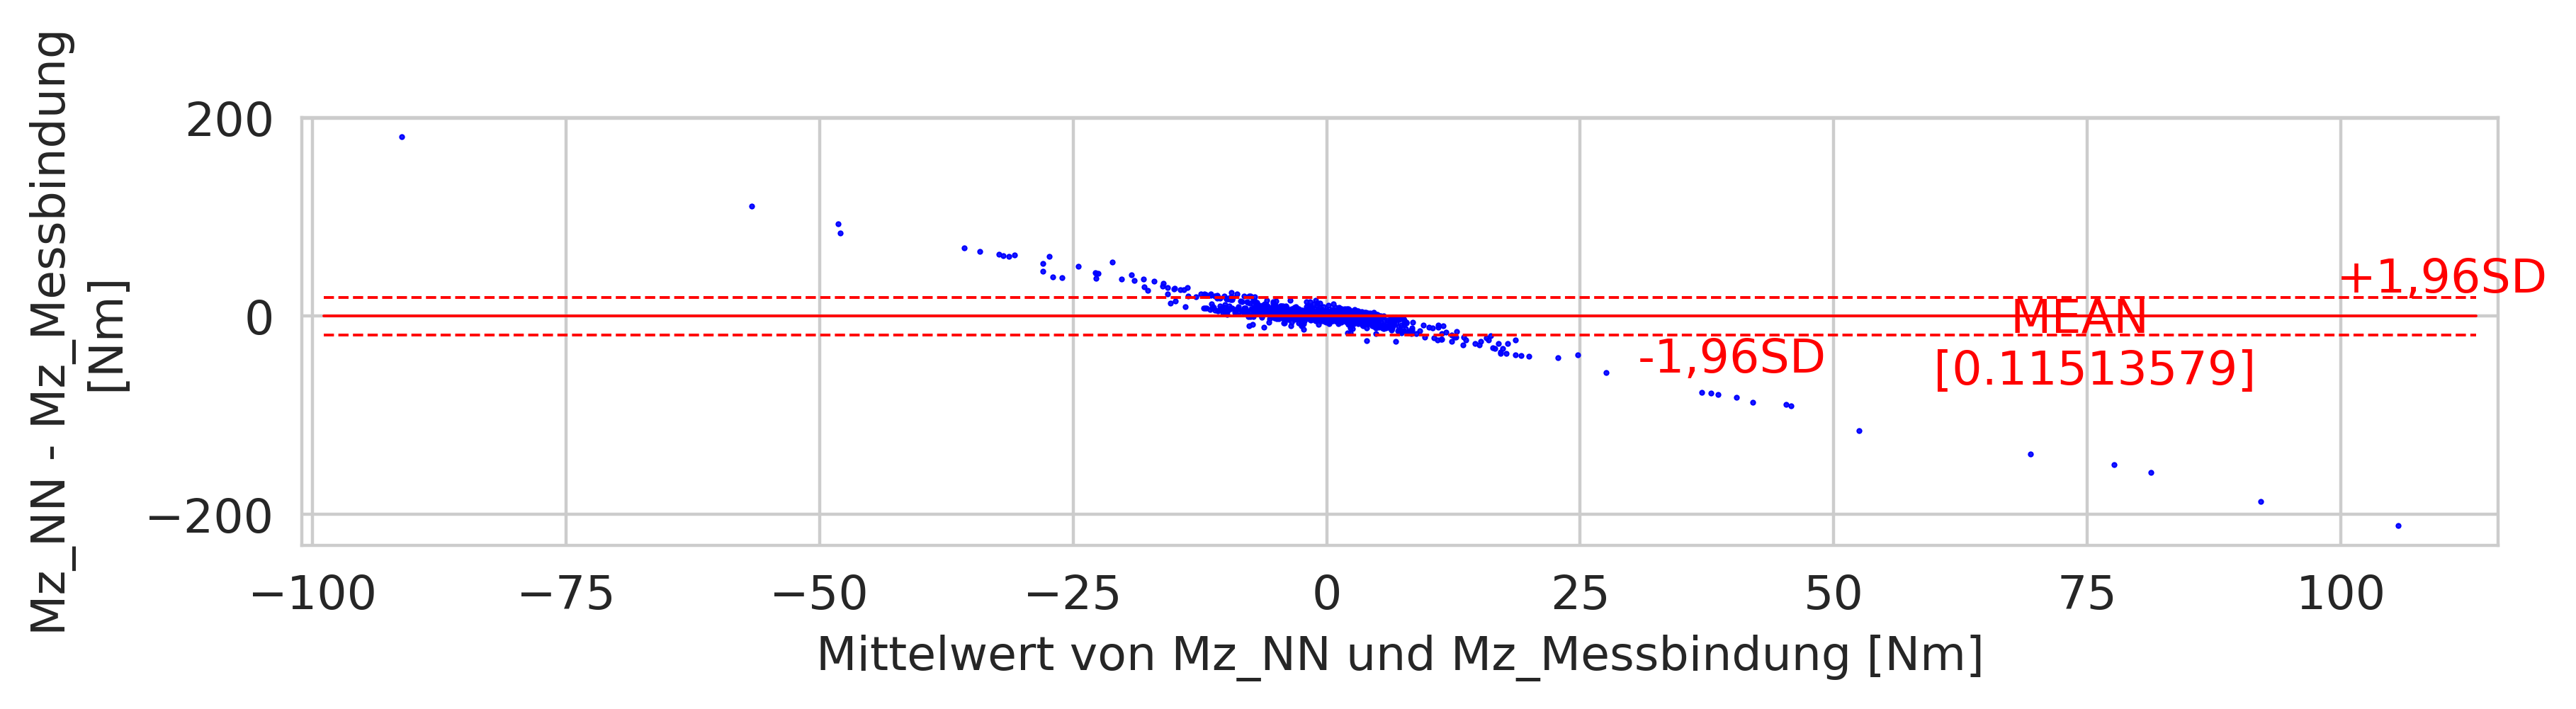

In [55]:
plt.figure(num=None, figsize=(10,2), dpi=400, facecolor='w', edgecolor='k')
plt.plot((y_real+predictions)/2, subtr, 'b.', markersize=1, label='Bindungswerte', linewidth=0.1)
#plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.9)

#plt.title('Bland-Altmann-Diagramm zum Vergleich des ' +name +' mit den Messbindungswerten für Mz', size=16)
plt.xlabel('Mittelwert von Mz_NN und Mz_Messbindung [Nm]')
plt.ylabel('Mz_NN - Mz_Messbindung\n[Nm]')
plt.axhline(y=mean_bland, xmin=0.01, xmax=0.99, color='r',linewidth=0.7)
plt.axhline(y=mean_bland-1.96*std_bland, xmin=0.01, xmax=0.99, color='r', linestyle='--',linewidth=0.7)
plt.axhline(y=mean_bland+1.96*std_bland, xmin=0.01, xmax=0.99, color='r', linestyle='--',linewidth=0.7)

plt.text(75, 20, 'MEAN \n '+str(mean_bland),
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center', color='r')
plt.text(110, 60, '+1,96SD',
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center', color='r')
plt.text(40, -21, '-1,96SD',
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center', color='r')

#plt.ylim(bottom=-10, top=10)

plt.show()

In [34]:
#MSE:
print('  MSE:               '+ str(((subtr*subtr).sum(axis=0)/(len(subtr)-2))**(1/2)))#/(max(y_real)-min(y_real))

  MSE:               [9.712165]


In [20]:
#SE:
(((subtr*subtr).sum(axis=0)/(len(subtr)-1))**(1/2))/((((y_real-y_real.mean(axis=0))**2).sum(axis=0))**(1/2))

array([0.01469509], dtype=float32)

In [22]:
subtr.std(axis=0)/(len(subtr)**(1/2))

array([0.14506063], dtype=float32)